# ***i. Introduction***
___
> Author      : Fhad Saleh 

> Dataset   : Informasi tentang pemain basket yg menjalani rehabilitasi akibat cidera. [Dataset](basketball_injury.csv) 

> Objective :
* Pembuat Model Classification untuk mengindentifikasi apakah seorang pemain basket akan mengalami kekambuhan cidera pasca menjalani rehablitasi.
* Model akan digunakan sebagai acuan untuk investigasi lebih lanjut apakah fisioterapi yg dijalani tepat / tidak.
* Akan dicari model terbaik berdasarkan nilai Recall. Karna pada project ini kasus yg berbahaya adalah model salah mengidentifikasi *class 0 / class negative*
* Model akan dievaluasi dengan Confusion Metrics, Accuracy, & Recall.
* Users: Pemain Basket, Coaching Staff, & Fisiotheraphy Tim Basket.

# ***ii. Import Libraries***
___
Mengimport semua library yang akan digunakan dalam project ini.

In [1]:
# Import Library

# import library yg biasa digunakan untuk DS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# library untuk membagi data ke dalam train set dan test set
from sklearn.model_selection import train_test_split
# library yg digunakan untuk scaling dan encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
# library untuk model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# library pipeline yg digunakan
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# library yg digunakan untul tuning hyperparameter
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
# library untuk melakukan boosting
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# library metrics yg digunakan untuk model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score
# library yg digunakan untun menyimpan pipeline
import joblib


# ***iii. Data Loading***
___
Melakukan preparation untuk dataset yg akan digunakan.

In [2]:
# loading data
data_ori = pd.read_csv('basketball_injury.csv')
df = data_ori.copy()
df

,Player_ID,Age,Height_cm,Weight_kg,Position,Injury_Type,Injury_Severity,Rehabilitation_Program,Rehabilitation_Time_weeks,Injury_Recurrence,Date_of_Injury,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
0,1,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,2017-12-19,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,2,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,2017-08-10,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,3,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,2018-11-21,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,4,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,2017-07-18,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,5,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,2015-03-05,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,2021-11-25,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,97,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,2018-02-19,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,98,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,2014-11-15,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,99,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,2018-03-27,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693


In [3]:
# pengecekan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Player_ID                        100 non-null    int64  
 1   Age                              100 non-null    int64  
 2   Height_cm                        100 non-null    int64  
 3   Weight_kg                        100 non-null    int64  
 4   Position                         100 non-null    object 
 5   Injury_Type                      100 non-null    object 
 6   Injury_Severity                  100 non-null    object 
 7   Rehabilitation_Program           100 non-null    object 
 8   Rehabilitation_Time_weeks        100 non-null    int64  
 9   Injury_Recurrence                100 non-null    int64  
 10  Date_of_Injury                   100 non-null    object 
 11  Rehabilitation_Efficiency_Score  100 non-null    float64
 12  knee_angle_deg         

Tidak terdapat *missing value* pada dataset.

In [4]:
# Menghapus kolom Player_ID
df = df.drop('Player_ID', axis=1)
# Menghapus kolom Date_of_Injury
df = df.drop('Date_of_Injury', axis=1)
df

,Age,Height_cm,Weight_kg,Position,Injury_Type,Injury_Severity,Rehabilitation_Program,Rehabilitation_Time_weeks,Injury_Recurrence,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
0,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693


* Menghapus kolom `Player_ID` karna merupakan kolom identitas pemain dan tidak berpengaruh pada pembuatan model.
* Menghapus kolom `Date_of_injury` karna tidak relevan terhadapa pembuatan model. Pemain dapat mengalami cedera kapan pun, saat bermain ataupun tidak. 

In [5]:
# cek duplikasi data pada dataset
df.duplicated().sum()

0

In [6]:
# merubah nama kolom
df.columns = ['Umur', 'Tinggi', 'Berat', 'Posisi', 
              'Tipe Cedera', 'Tingkat Cedera', 'Program Rehab',
              'Durasi Rehab (dalam minggu)', 'Potensi Kekambuhan', 
              'Rehabilitasi Skor', 'Sudut Lutut', 
              'Tinggi Lompatan', 'Sudut Fleksibel Angkle',
              'Kecepatan Gerak', 'Kecepatan Reflek']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Umur                         100 non-null    int64  
 1   Tinggi                       100 non-null    int64  
 2   Berat                        100 non-null    int64  
 3   Posisi                       100 non-null    object 
 4   Tipe Cedera                  100 non-null    object 
 5   Tingkat Cedera               100 non-null    object 
 6   Program Rehab                100 non-null    object 
 7   Durasi Rehab (dalam minggu)  100 non-null    int64  
 8   Potensi Kekambuhan           100 non-null    int64  
 9   Rehabilitasi Skor            100 non-null    float64
 10  Sudut Lutut                  100 non-null    float64
 11  Tinggi Lompatan              100 non-null    float64
 12  Sudut Fleksibel Angkle       100 non-null    float64
 13  Kecepatan Gerak      

# ***iv. Exploratory Data Analysis (EDA)***
___
Pada bagian ini akan dilakukan eksplorasi pada dataset yg sudah dicleansing dengan menggunakan query, grouping, visualisasi data sederhana dan sebagainya.


In [7]:
eda = df.copy()
eda

,Umur,Tinggi,Berat,Posisi,Tipe Cedera,Tingkat Cedera,Program Rehab,Durasi Rehab (dalam minggu),Potensi Kekambuhan,Rehabilitasi Skor,Sudut Lutut,Tinggi Lompatan,Sudut Fleksibel Angkle,Kecepatan Gerak,Kecepatan Reflek
0,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693


## Uji Korelasi

In [8]:
# mengambil data yg bertipe numerical ke dalam list
num_cols = eda.select_dtypes(
    include=np.number
    ).columns.tolist()

# mengambil data yg bertipe object ke dalam list
cat_cols = eda.select_dtypes(
    include=['object']
    ).columns.tolist()

### *Pearson*

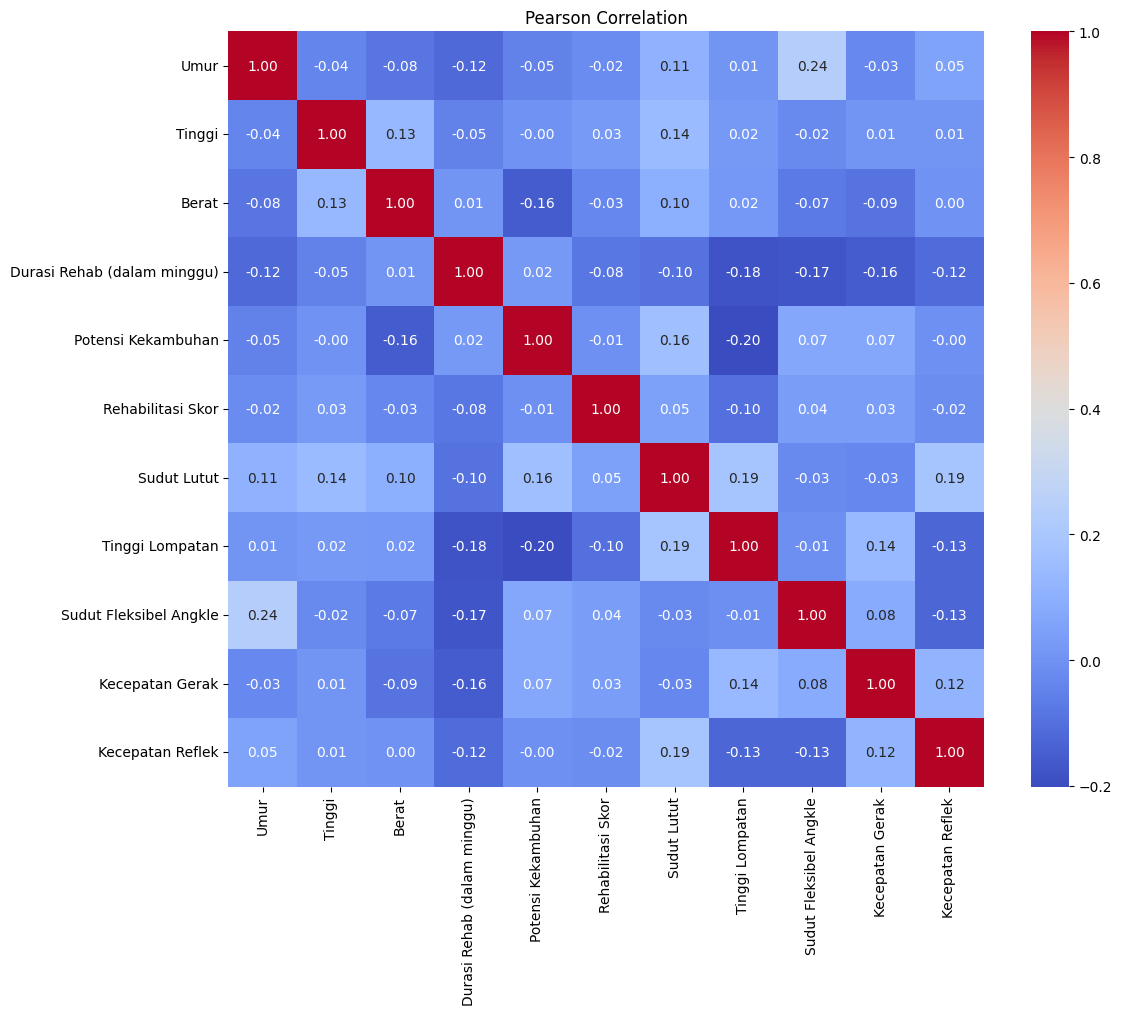

In [9]:
# melakukan pengecekan korelasi dengan metode pearson
pearson_corr = eda[num_cols].corr(method='pearson')
# pearson correlation dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Pearson Correlation")
plt.tight_layout()
plt.show()

Dapat terlihat dari *HeatMap Pearson Correlation* bahwa semua kolom numerical ***tidak memiliki korelasi*** yg kuat antara fitur satu sama lain.

### *Chi-Square*

In [10]:
# Simpan hasil chi-square ke list
res = []
# melakukan pengecekan kolom categorical dengan chi square
for col in cat_cols:
    ct = pd.crosstab(eda[col], eda['Potensi Kekambuhan'])
    chi2, p, _, _ = stats.chi2_contingency(ct)
    print(f"{col} → P-value: {p:.4f} →", 
          "Signifikan" if p < 0.05 else "Tidak Signifikan")
    res.append({"Fitur": col, "Chi2": chi2, "P-value": p})

Posisi → P-value: 0.3439 → Tidak Signifikan
Tipe Cedera → P-value: 0.6258 → Tidak Signifikan
Tingkat Cedera → P-value: 0.5305 → Tidak Signifikan
Program Rehab → P-value: 0.4095 → Tidak Signifikan


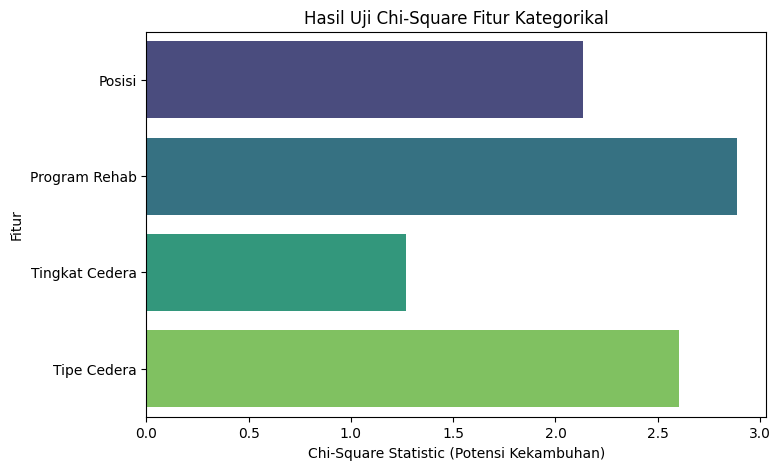

In [11]:
# membuat dataframe dengan hasil dari uji korelasi chi-square
chi_df = pd.DataFrame(res).sort_values("P-value", ascending=True)

# membuat visualisasi chi-square
plt.figure(figsize=(8, 5))
sns.barplot(data=chi_df, x="Chi2", y="Fitur", hue="Fitur", palette="viridis")
plt.title("Hasil Uji Chi-Square Fitur Kategorikal")
plt.xlabel("Chi-Square Statistic (Potensi Kekambuhan)")
plt.ylabel("Fitur")
plt.show()

Meskipun dari Visualisasi hasil uji *Chi-Square* `Program Rehab` memiliki hubungan yg kuat dengan `Potensi Kekambuhan`. Akan tetapi nilai p-value menunjukan bahwa korelasi antara kolom **Tidak Signifikan**.

Berdasarkan Uji Korelasi Chi-Square, dapat dikatakan tidak ada bukti statisktik yg menunjukan bahwa *semua kolom categorical memiliki pengaruh yg kuat terhadap `Potensi Kekambuhan`*.

### *ANNOVA F-test*

In [12]:
for c in num_cols:
    # Pisahkan data berdasarkan target
    group0 = eda[eda['Potensi Kekambuhan'] == 0][c]
    group1 = eda[eda['Potensi Kekambuhan'] == 1][c]

    # ANOVA F-test
    f_stat, p_value = stats.f_oneway(group0, group1)
    print(f"{c} → P-value: {p:.4f} →", 
        "Signifikan" if p < 0.05 else "Tidak Signifikan")

Umur → P-value: 0.4095 → Tidak Signifikan
Tinggi → P-value: 0.4095 → Tidak Signifikan
Berat → P-value: 0.4095 → Tidak Signifikan
Durasi Rehab (dalam minggu) → P-value: 0.4095 → Tidak Signifikan
Potensi Kekambuhan → P-value: 0.4095 → Tidak Signifikan
Rehabilitasi Skor → P-value: 0.4095 → Tidak Signifikan
Sudut Lutut → P-value: 0.4095 → Tidak Signifikan
Tinggi Lompatan → P-value: 0.4095 → Tidak Signifikan
Sudut Fleksibel Angkle → P-value: 0.4095 → Tidak Signifikan
Kecepatan Gerak → P-value: 0.4095 → Tidak Signifikan
Kecepatan Reflek → P-value: 0.4095 → Tidak Signifikan


c:\Users\HelasOn7\miniconda3\envs\h8_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# cek distribusi data semua kolom
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,100.0,25.480000,4.835642,18.000000,21.000000,25.000000,29.000000,34.000000
Tinggi,100.0,190.060000,12.126288,170.000000,179.500000,192.000000,201.000000,209.000000
Berat,100.0,92.070000,11.446189,70.000000,85.000000,94.000000,102.000000,109.000000
Durasi Rehab (dalam minggu),100.0,6.920000,2.956520,2.000000,4.750000,7.000000,9.250000,11.000000
Potensi Kekambuhan,100.0,0.250000,0.435194,0.000000,0.000000,0.000000,0.250000,1.000000
Rehabilitasi Skor,100.0,0.745052,0.148033,0.507272,0.605653,0.735664,0.879300,0.999859
Sudut Lutut,100.0,60.999925,19.287205,31.404984,44.764634,58.288835,74.268322,99.297216
Tinggi Lompatan,100.0,68.229856,19.188804,31.267713,53.820140,70.276652,85.296794,97.551884
Sudut Fleksibel Angkle,100.0,60.652999,20.473906,30.324242,42.726347,58.332403,76.527202,99.781198
Kecepatan Gerak,100.0,64.283236,19.424545,30.769708,48.281897,65.534938,80.493213,98.908153


In [72]:
eda

,Umur,Tinggi,Berat,Posisi,Tipe Cedera,Tingkat Cedera,Program Rehab,Durasi Rehab (dalam minggu),Potensi Kekambuhan,Rehabilitasi Skor,Sudut Lutut,Tinggi Lompatan,Sudut Fleksibel Angkle,Kecepatan Gerak,Kecepatan Reflek
0,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693


In [73]:
eda.groupby('Program Rehab')['Program Rehab'].count()

Program Rehab
Balance Training         22
Flexibility Exercises    20
Physiotherapy            28
Strength Training        30
Name: Program Rehab, dtype: int64

In [74]:
eda.groupby('Tingkat Cedera')['Tingkat Cedera'].count()

Tingkat Cedera
Mild        27
Moderate    31
Severe      42
Name: Tingkat Cedera, dtype: int64

In [75]:
eda.groupby('Posisi')['Posisi'].count()

Posisi
Center     36
Forward    29
Guard      35
Name: Posisi, dtype: int64

# ***v. Feature Engineering***
___

In [14]:
fe = df.copy()
fe

,Umur,Tinggi,Berat,Posisi,Tipe Cedera,Tingkat Cedera,Program Rehab,Durasi Rehab (dalam minggu),Potensi Kekambuhan,Rehabilitasi Skor,Sudut Lutut,Tinggi Lompatan,Sudut Fleksibel Angkle,Kecepatan Gerak,Kecepatan Reflek
0,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693


## *Split Train Set & Test Set*

In [15]:
# membuat data target dan fitur
y = fe['Potensi Kekambuhan']
X = fe.drop('Potensi Kekambuhan', axis=1)
# membuat data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (75, 14)
Test size  :  (25, 14)


## *Check Distribution Class Target*

In [16]:
# check distribusi class target dari train set  
y_train.value_counts()

Potensi Kekambuhan
0    56
1    19
Name: count, dtype: int64

Secara distribusi, ratio perbandingan **Class Positive** dan **Class Negative** masih dapat dikatakan bahwa distribusi data target seimbang / **balance**. Sehingga tidak diperlukan ***balancing data target***

## *Spliting Numeric & Categorical Features*

In [17]:
# mengambil data yg bertipe numerik  kecuali  ke dalam list
num_columns = X_train.select_dtypes(
    include=np.number
    ).columns.tolist()

# mengambil data yg bertipe object ke dalam list
cat_columns = X_train.select_dtypes(
    include=['object']
    ).columns.tolist()
# menambah kan fitur  ke dalam list katagori
print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Umur', 'Tinggi', 'Berat', 'Durasi Rehab (dalam minggu)', 'Rehabilitasi Skor', 'Sudut Lutut', 'Tinggi Lompatan', 'Sudut Fleksibel Angkle', 'Kecepatan Gerak', 'Kecepatan Reflek']
Categorical Columns :  ['Posisi', 'Tipe Cedera', 'Tingkat Cedera', 'Program Rehab']


## *Check Distribution Numerical Features*

In [18]:
# melakukan looping pada list
for c in num_columns:
    # .skew() untuk mengambil dinilai skew pada gitur
    skew = df[c].skew()
    # kondisi untuk distribusi normal
    if skew >= -0.5 and skew <= 0.5:
        printSkew = '\033[1m Normal \033[0m'
    # kondisi untuk distribusi extreme
    elif skew <= -0.1 or skew >= 1:
        printSkew = '\033[1m Extreme \033[0m'
    # else untuk distibusi skew 
    else:
        printSkew = '\033[1m Skew \033[0m'
    # menampilkan nilai skew tiap fitur
    print(f'nilai skew {c} : {skew:.4f}, jadi distribusinya adalah {printSkew}')

nilai skew Umur : 0.0720, jadi distribusinya adalah  Normal 
nilai skew Tinggi : -0.1651, jadi distribusinya adalah  Normal 
nilai skew Berat : -0.4580, jadi distribusinya adalah  Normal 
nilai skew Durasi Rehab (dalam minggu) : -0.1453, jadi distribusinya adalah  Normal 
nilai skew Rehabilitasi Skor : 0.1289, jadi distribusinya adalah  Normal 
nilai skew Sudut Lutut : 0.3502, jadi distribusinya adalah  Normal 
nilai skew Tinggi Lompatan : -0.2161, jadi distribusinya adalah  Normal 
nilai skew Sudut Fleksibel Angkle : 0.2861, jadi distribusinya adalah  Normal 
nilai skew Kecepatan Gerak : -0.0129, jadi distribusinya adalah  Normal 
nilai skew Kecepatan Reflek : -0.0724, jadi distribusinya adalah  Normal 


Semua Distribusi pada *feature numerical* adalah normal.

## *Check Cardinality Categorical Features*

In [19]:
# cek cardinality pada categorical features
for c in cat_columns:
    print(f'Jumlah nilai unique yg dimiliki kolom {c} adalah: ',len(X_train[c].unique()))

Jumlah nilai unique yg dimiliki kolom Posisi adalah:  3
Jumlah nilai unique yg dimiliki kolom Tipe Cedera adalah:  5
Jumlah nilai unique yg dimiliki kolom Tingkat Cedera adalah:  3
Jumlah nilai unique yg dimiliki kolom Program Rehab adalah:  4


In [20]:
# pengecekan unique value pada categorical features yg ada pada train set tp tidak ada pada test set dan sebaliknya
for c in cat_cols:
    unique_to_train_src = [x for x in X_train[c].unique() if x not in X_test[c].unique()]
    unique_to_test_src = [x for x in X_test[c].unique() if x not in X_train[c].unique()]

    print(f'{c} - Train to Test : ', len(unique_to_train_src))
    print(f'{c} - Test to Train  : ', len(unique_to_test_src))

Posisi - Train to Test :  0
Posisi - Test to Train  :  0
Tipe Cedera - Train to Test :  0
Tipe Cedera - Test to Train  :  0
Tingkat Cedera - Train to Test :  0
Tingkat Cedera - Test to Train  :  0
Program Rehab - Train to Test :  0
Program Rehab - Test to Train  :  0


Setelah dilakukan pengecekan *cardinality* diketahui bahwa; semua distribusi *value categorical features* terdapat pada *Train Set & Test Set*.

## *Check Outliers*

Karna semua distribusi *numerical features* adalah normal. Maka pengecekan outlier akan dilakukan dengan menggunakan *Z-Scores*

In [21]:
# menggunakan rumus z-scores untuk mencari batas atas dan bawah pada fitur PURCHASES_FREQUENCY yg memiliki distribusi normal
print(f'Total data         : {len(X_train)}')
print()
for c in num_columns:
    upper_boundary = X_train[c].mean() + 3 * X_train[c].std()
    lower_boundary = X_train[c].mean() - 3 * X_train[c].std()
    print(f'Fitur {c} memiliki nilai Upper Boundary: {upper_boundary:.4f}')
    print(f'Fitur {c} memiliki nilai Lower Boundary: {lower_boundary:.4f}')
    print(f'Jumlah {c} yg memiliki lebih dari {upper_boundary:.4f} : ', (len(X_train[X_train[c] > upper_boundary])))
    print(f'Jumlah {c} yg memiliki nilai kurang dari  {lower_boundary:.4f}  :', len(X_train[X_train[c] < lower_boundary]))
    print()

Total data         : 75

Fitur Umur memiliki nilai Upper Boundary: 40.6331
Fitur Umur memiliki nilai Lower Boundary: 11.6336
Jumlah Umur yg memiliki lebih dari 40.6331 :  0
Jumlah Umur yg memiliki nilai kurang dari  11.6336  : 0

Fitur Tinggi memiliki nilai Upper Boundary: 226.2569
Fitur Tinggi memiliki nilai Lower Boundary: 152.0364
Jumlah Tinggi yg memiliki lebih dari 226.2569 :  0
Jumlah Tinggi yg memiliki nilai kurang dari  152.0364  : 0

Fitur Berat memiliki nilai Upper Boundary: 126.7276
Fitur Berat memiliki nilai Lower Boundary: 57.6991
Jumlah Berat yg memiliki lebih dari 126.7276 :  0
Jumlah Berat yg memiliki nilai kurang dari  57.6991  : 0

Fitur Durasi Rehab (dalam minggu) memiliki nilai Upper Boundary: 15.3830
Fitur Durasi Rehab (dalam minggu) memiliki nilai Lower Boundary: -1.7030
Jumlah Durasi Rehab (dalam minggu) yg memiliki lebih dari 15.3830 :  0
Jumlah Durasi Rehab (dalam minggu) yg memiliki nilai kurang dari  -1.7030  : 0

Fitur Rehabilitasi Skor memiliki nilai Upper 

Dari hasil pengecekan *ouliers* dengan metode *Z-Scores*, tidak ditemukan adanya outlier. Sehingga tidak perlu melakukan *outlier handling*.

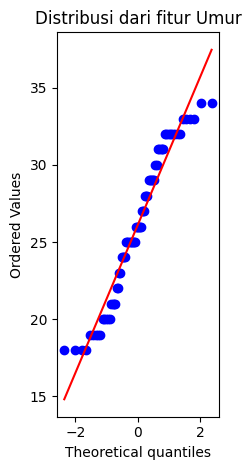

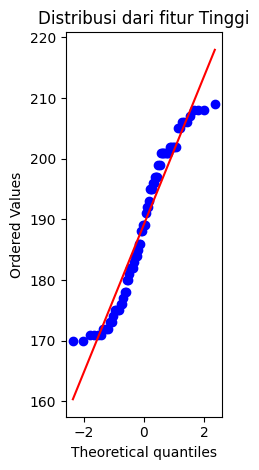

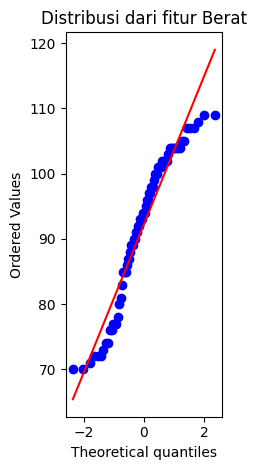

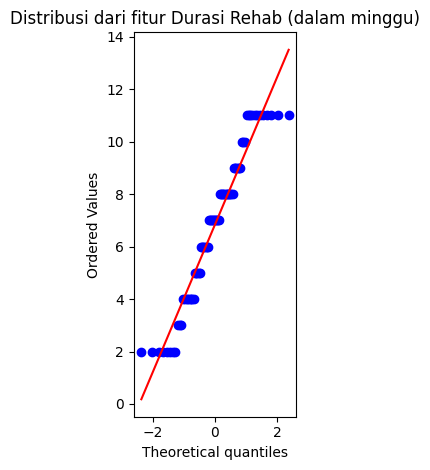

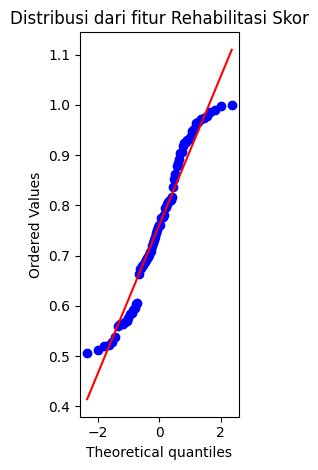

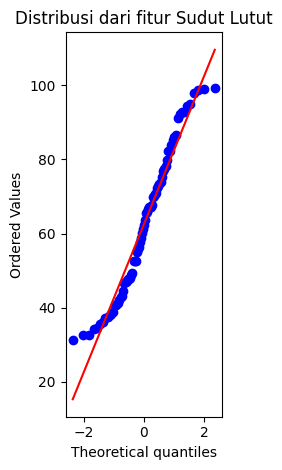

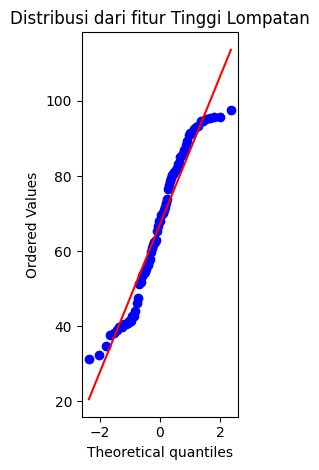

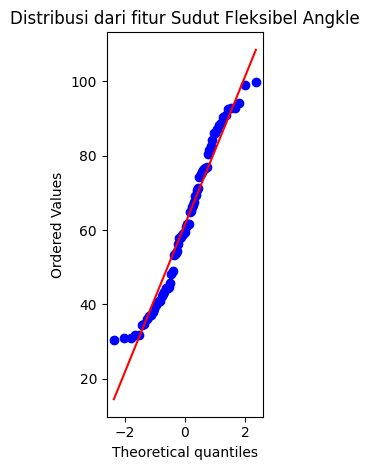

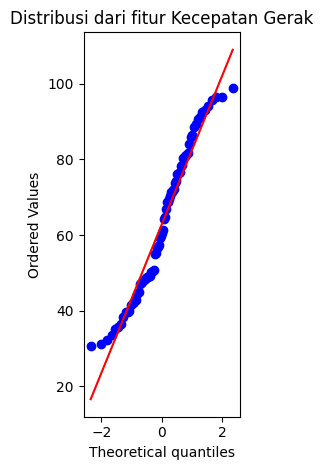

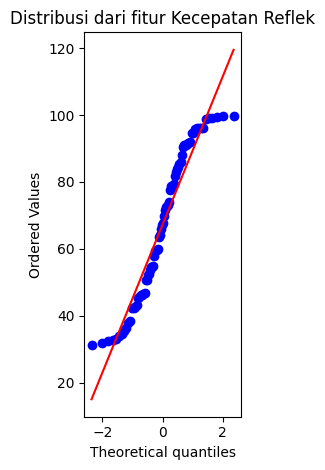

In [22]:
# Visualisasi outlier dengan QQ-plot
for c in num_columns:
    plt.subplot(1, 3, 3)
    stats.probplot(X_train[c], dist="norm", plot=plt)
    plt.title(f"Distribusi dari fitur {c}")

    plt.tight_layout()
    plt.show()

Dilihat *QQ-plot* bahwa distribusi data membentuk huruf ***S***, mengikuti garis merah (garis distribusi normal). Meskipun ada data yg sedikit menjauh dari garis merah pada ujung ekor & kepala, namun **tidak dianggap sebagai outlier**.

## *Fitur Selection*
### *Multicolinearity*
Fitur Selection dilakukan untuk mengurangi *Multicolinearity* pada fitur (*variable independen*). Untuk menghindari model yg memiliki asumsi sensitif terhadap multikolinearitas.

In [23]:
# mengkopi dataframe X_train dengan num_columns
fs = fe[num_columns].copy()
# Membuat fungsi untuk menentukan nilai VIF setiap fitur
def calc_vif(X, cols):
    vif = pd.DataFrame()
    vif["features"] = cols
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["status"] = vif["VIF"].apply(
        lambda x: "Low" if x < 5 else ("Medium" if x <= 10 else "High"))
    vif = vif.sort_values('VIF', ascending=False).reset_index(drop=True)
    return(vif)

In [24]:
# memanggil fungsi calc_vif
best_fitur = calc_vif(fs, fs.columns)
# menampung nilai kolom features dari best_fitur
f = best_fitur['features'].tolist()
# membuat variable untuk menampung status fitur paling atas
status = best_fitur['status'][0]
best_fitur

,features,VIF,status
0,Tinggi,124.170978,High
1,Berat,60.976439,High
2,Umur,29.099713,High
3,Rehabilitasi Skor,25.248421,High
4,Tinggi Lompatan,15.068894,High
5,Kecepatan Gerak,12.815755,High
6,Sudut Lutut,12.681374,High
7,Kecepatan Reflek,11.396022,High
8,Sudut Fleksibel Angkle,10.908546,High
9,Durasi Rehab (dalam minggu),6.695805,Medium


In [25]:
# melakukan looping hingga status != High 
# atau tidak lg ditemukan nilai VIF > 10
while status == 'High':    
    # menghapus fitur yg memiliki nilai VIF paling tinggi
    del f[0]
    best_fitur.drop(0, inplace=True)
    # inisiasi ulang fs dengan fitur yg sudah dihapus
    fs = fs[f]
    # memanggil ulang fungsi calc_vif
    best_fitur = calc_vif(fs, f)
    # inisiasi ulang status
    status = best_fitur['status'][0]
# menampilkan hasiil best VIF yg sudah tidak memiliki status
best_fitur

,features,VIF,status
0,Kecepatan Gerak,9.987109,Medium
1,Sudut Lutut,9.467544,Medium
2,Kecepatan Reflek,9.450059,Medium
3,Sudut Fleksibel Angkle,7.649471,Medium
4,Durasi Rehab (dalam minggu),4.861545,Low


Setelah menghapus kolom yg memiliki nilai VIF (*Multicolinearity*) tinggi / *high*. Tersisa `5` fitur saja untuk numerical dari sebelumnya ada `10` fitur.

### Uji korelasi *Pearson* antara *numerical features*

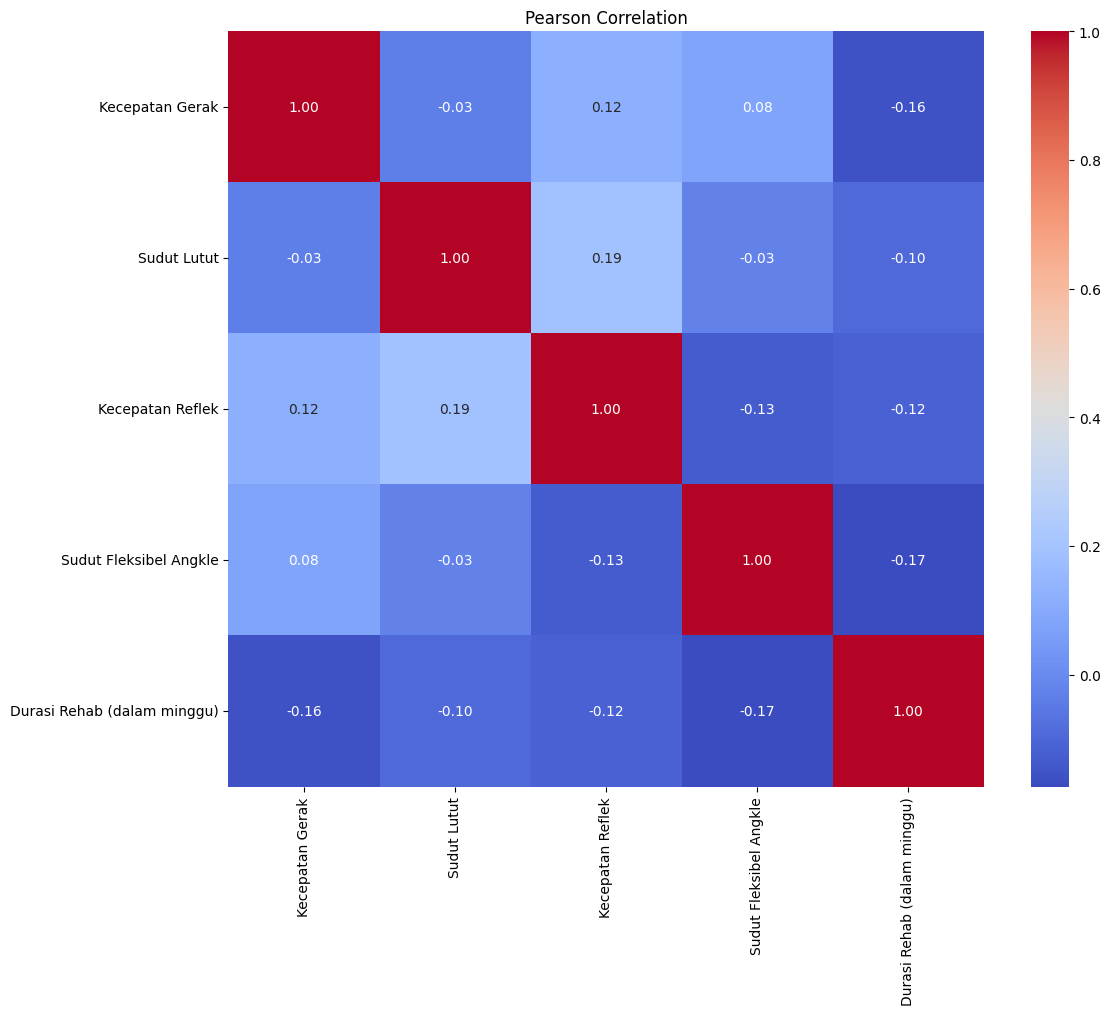

In [26]:
# Melakukan pengecekan korelasi antar fitur dengan Pearson
pearson_corr = fs.corr(method='pearson')
# Visualisasi Pearson Correlation Dengan HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Pearson Correlation")
plt.tight_layout()
plt.show()

Setelah melakukan pengecekan dengan metode *pearson*, tidak ditemukan adanya nilai korelasi yg tinggi antara fitur numerik satu sama lain.

### Uji korelasi *Spearman* antara *numerical features*

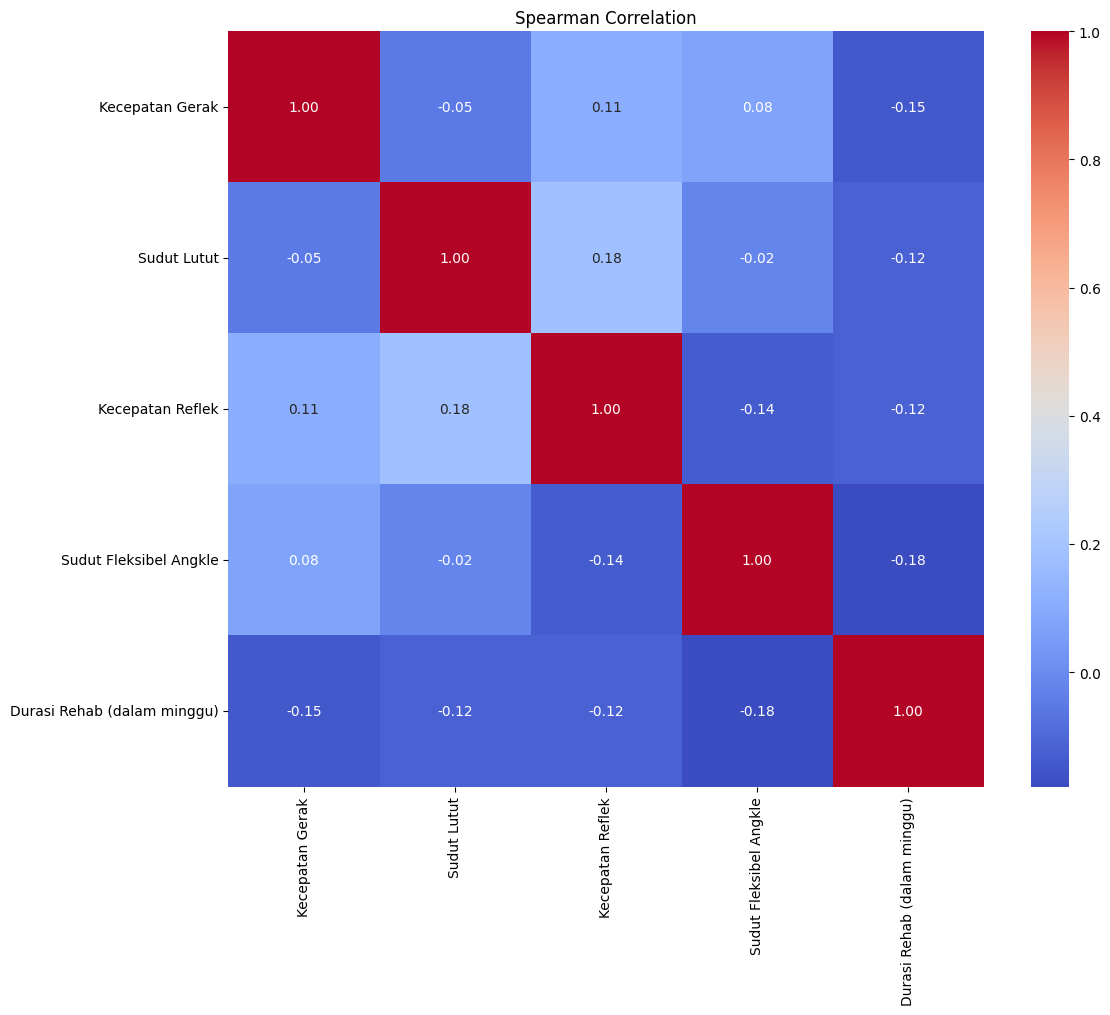

In [27]:
# Melakukan pengecekan korelasi antar fitur dengan Spearman
spearman_corr = fs.corr(method='spearman')
# Visualisasi HeatMap Spearman Correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation")
plt.tight_layout()  
plt.show()

Sama halnya dengan *pearson*, tidak ditemukan jg fitur yg saling mempengaruhi satu sama lain dengan *spearman*

### Uji korelasi *Chi-Square* categorical features terhadap target

In [28]:
# melakukan uji korelasi fitur categorical terhadap target
for col in cat_columns:
    ct = pd.crosstab(fe[col], y)
    chi2, p, _, _ = stats.chi2_contingency(ct)
    print(f"{col} → P-value: {p:.4f} →", 
          "Signifikan" if p < 0.05 else "Tidak Signifikan")

Posisi → P-value: 0.3439 → Tidak Signifikan
Tipe Cedera → P-value: 0.6258 → Tidak Signifikan
Tingkat Cedera → P-value: 0.5305 → Tidak Signifikan
Program Rehab → P-value: 0.4095 → Tidak Signifikan


Setelah dilakukan uji korelasi *Chi-Square* untuk categorical feature terhadap target. Tidak ditemukan adanya fitur yg memiliki korelasi signifikan terhadap target atau tidak ada fitur yg mendominasi target sehingga dapat membuat model menjadi bias.

Jadi semua *categorical feature* dapat digunakan untuk modeling

In [29]:
# inisiasi ulang numerical features dengan fitur yg telah diseleksi
num_columns = best_fitur['features'].tolist()
num_columns

['Kecepatan Gerak',
 'Sudut Lutut',
 'Kecepatan Reflek',
 'Sudut Fleksibel Angkle',
 'Durasi Rehab (dalam minggu)']

## *Feature Scaling*
Karna semua distribusi *numerical features* normal dan tidak memiliki outlier. Maka *StandartScaler* cocok untuk digunakan.

In [30]:
# inisiasi standar scaler dengan pipeline untuk numerical feature
numPipe = Pipeline([('scaling', StandardScaler())])
numPipe

Pipeline(steps=[('scaling', StandardScaler())])

## *Feature Encoding*
Melakukan pengecekan value categorical features untuk memisahkan antara fitur *ordinal & nominal*.

In [31]:
# melakukan pengecekan nilai categorical features 
for c in cat_columns:
    print(f'unique value yg dimiliki kolom {c} adalah: ', df[c].unique().tolist())

unique value yg dimiliki kolom Posisi adalah:  ['Center', 'Forward', 'Guard']
unique value yg dimiliki kolom Tipe Cedera adalah:  ['ACL Tear', 'Ankle Sprain', 'Knee Injury', 'Shoulder Dislocation', 'Hamstring Strain']
unique value yg dimiliki kolom Tingkat Cedera adalah:  ['Severe', 'Mild', 'Moderate']
unique value yg dimiliki kolom Program Rehab adalah:  ['Physiotherapy', 'Flexibility Exercises', 'Strength Training', 'Balance Training']


## Split *Ordinal & Nominal Features*

Fitur `Tingkat Cedera` termasuk ke dalam Ordinal sedangkan sisanya masuk ke dalam Nominal.

In [32]:
ordinal_cols = ['Tingkat Cedera']
nominal_cols = ['Posisi', 'Tipe Cedera','Program Rehab']

## *Ordinal*

Karna fitur `Tingkat Cedera` merupakan fitur Ordinal yg memiliki tingkatan, maka akan dilakukan fitur *encoding* dengan menggunakan *OrdinalEncoder*.

In [33]:
# cek value Tingkat Cedera
fe['Tingkat Cedera'].unique()

array(['Severe', 'Mild', 'Moderate'], dtype=object)

In [34]:
# inisiasi OrdinalEncoder
ordinalEncode = OrdinalEncoder(categories=[['Mild', 'Moderate', 'Severe']])

# ***vi. Model Definition***
___
> * *Scaling* dilakukan dengan menggunakan *Standart Scaler* terhadap *numercial features*.
> * Untuk *ordinal categorical features* dilakukan encoding menggunakan *Ordinal Encoder*. Sedangkan untuk nominal dilakukan dengan menggunakan *One Hot Encoding*.
> * Model yg akan digunakan pada project ini akan diseleksi terlebih dahulu berdasarkan nilai *Recall* tertinggi.
> * Model yg memiliki nilai Recall terbaik akan dilakukan *hyper parameter tuning* dengan *GridCV*. 
> * Model akan dievaluasi dengan *Confusion Metrics & Classification Report.*
> * *Pipeline & ColumnTransformer* digunakan untuk '*membungkus*' model dan *preprocessing* untuk mempermudah *model saving* dan *model inference*.
> * *Model Saving* dilakukan dengan menggunakan *library joblib*.
> *Data Inference* untuk *Model Inference* akan dibuat dengan *data synthetic* yg diambil berdasarkan distribusi data asli.


# ***vii. Model Training***
___
## *Preparation*
### *Preprocessing*

In [35]:
# membuat ColumnTransfer untuk menggabungkan proses scaling dan encoding dengan masing-masing featur
preprocess = ColumnTransformer(transformers=[
    ('numerical', numPipe, num_columns),
    ('ordinal', ordinalEncode, ordinal_cols),
    ('nominal', OneHotEncoder(), nominal_cols)
])
preprocess

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['Kecepatan Gerak', 'Sudut Lutut',
                                  'Kecepatan Reflek', 'Sudut Fleksibel Angkle',
                                  'Durasi Rehab (dalam minggu)']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Mild', 'Moderate',
                                                             'Severe']]),
                                 ['Tingkat Cedera']),
                                ('nominal', OneHotEncoder(),
                                 ['Posisi', 'Tipe Cedera', 'Program Rehab'])])

### *Pipeline - KKN Model*

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knnPipe = Pipeline([
    ('preprocess', preprocess),
    ('knn', knn)
])
knnPipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

### *Pipeline - SVC Model*

In [37]:
svc = SVC(kernel='linear')
svcPipe = Pipeline([
    ('preprocess', preprocess),
    ('svc', svc)
])
svcPipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('svc', SVC(kernel='linear'))])

### *Pipeline - Decision Tree Model*

In [38]:
dTree = DecisionTreeClassifier(random_state=42)
dTreePipe = Pipeline([
    ('preprocess', preprocess),
    ('dTree', dTree)
])
dTreePipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('dTree', DecisionTreeClassifier(random_state=42))])

### *Pipeline - Random Forest Model*

In [39]:
rf = RandomForestClassifier(
    n_estimators=100,       # jumlah pohon
    max_depth=10,         # tidak dibatasi
    random_state=42
)
rfPipe = Pipeline([
    ('preprocess', preprocess),
    ('rf', rf)
])
rfPipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('rf', RandomForestClassifier(max_depth=10, random_state=42))])

### *Pipeline - AdaBoost + Decision Tree Base*

In [40]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
adaPipe = Pipeline([
    ('preprocess', preprocess),
    ('ada', ada)

])
adaPipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('ada',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                    random_state=42))])

## *Model Training*

### *Model Training - KNN*

In [41]:
knnModel = knnPipe.fit(X_train, y_train)
knnModel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [42]:
results = cross_validate(
    knnModel, X_train, y_train,
    cv=3,
    scoring=['recall'],
    return_train_score=True
)
res = results['test_recall']
for i in range(len(res)):
    print(f'Cross Validate - Fold {i}: {res[i]:.4f}')

scores = cross_val_score(knnModel, X_train, y_train, cv=3, scoring='recall')
print()
print(f'Cross Validate Score Mean: {scores.mean():.4f}')

Cross Validate - Fold 0: 0.1429
Cross Validate - Fold 1: 0.3333
Cross Validate - Fold 2: 0.0000

Cross Validate Score Mean: 0.1587


Hasil dari Cross Validate:
- Fold 0: Model mendeteksi ada sekitar `14%` *class positif*.
- Fold 1: Model medeteksi ada sekitar `33%` *class positif*.
- fold 2: Model tidak bisa medeteksi satupu *class positif*.

> Secara keseluruhan nilai rata-rata untuk hasil pengecekan *Cross Validate = `0.1587`* dengan scoring recall. Artinya banyak *False Negatif* atau *Positive Class* yg tidak terdeteksi oleh ***KNN model***. Jadi ***model tidak cocok digunakan*** untuk kasus dalam project ini.

### *Model Training - SVC*

In [43]:
svcModel = svcPipe.fit(X_train, y_train)
svcModel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('svc', SVC(kernel='linear'))])

In [44]:
results = cross_validate(
    svcModel, X_train, y_train,
    cv=3,
    scoring=['recall'],
    return_train_score=True
)
res = results['test_recall']
for i in range(len(res)):
    print(f'Cross Validate - Fold {i}: {res[i]:.4f}')

scores = cross_val_score(svcModel, X_train, y_train, cv=3, scoring='recall')
print()
print(f'Cross Validate Score Mean: {scores.mean():.4f}')

Cross Validate - Fold 0: 0.0000
Cross Validate - Fold 1: 0.1667
Cross Validate - Fold 2: 0.1667

Cross Validate Score Mean: 0.1111


Hasil dari Cross Validate:
- Fold 0: Model tidak bisa medeteksi satupun *class positif*. 
- Fold 1: Model medeteksi ada sekitar `16%` *class positif*.
- fold 2: Model medeteksi ada sekitar `16%` *class positif*.

> Secara keseluruhan nilai rata-rata untuk hasil pengecekan *Cross Validate = `0.1111`* dengan scoring recall. Artinya banyak *False Negatif* atau *Positive Class* yg tidak terdeteksi oleh **SVC model**. Jadi ***model tidak cocok digunakan*** untuk kasus dalam project ini

### *Model Training - Decision Tree*

In [45]:
dTreeModel = dTreePipe.fit(X_train, y_train)
dTreeModel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('dTree', DecisionTreeClassifier(random_state=42))])

In [46]:
results = cross_validate(
    dTreeModel, X_train, y_train,
    cv=3,
    scoring=['recall'],
    return_train_score=True
)
res = results['test_recall']
for i in range(len(res)):
    print(f'Cross Validate - Fold {i}: {res[i]:.4f}')

scores = cross_val_score(dTreeModel, X_train, y_train, cv=3, scoring='recall')
print()
print(f'Cross Validate Score Mean: {scores.mean():.4f}')

Cross Validate - Fold 0: 0.1429
Cross Validate - Fold 1: 0.6667
Cross Validate - Fold 2: 0.5000

Cross Validate Score Mean: 0.4365


Hasil dari Cross Validate:
- Fold 0: Model medeteksi ada sekitar `14%` *class positif*. 
- Fold 1: Model medeteksi ada sekitar `66%` *class positif*.
- fold 2: Model medeteksi ada sekitar `50%` *class positif*.

> Secara keseluruhan nilai rata-rata untuk hasil pengecekan *Cross Validate = `0.4365`* dengan scoring recall. Artinya ada sekitar `57%` *False Negatif* atau *Positive Class* yg tidak terdeteksi oleh **Decision Tree model**. Jadi ***Model bisa digunakan*** untuk kasus project ini.

### *Model Training - Random Forest*

In [47]:
rfModel = rfPipe.fit(X_train, y_train)
rfModel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('rf', RandomForestClassifier(max_depth=10, random_state=42))])

In [48]:
results = cross_validate(
    rfModel, X_train, y_train,
    cv=3,
    scoring=['recall'],
    return_train_score=True
)
res = results['test_recall']
for i in range(len(res)):
    print(f'Cross Validate - Fold {i}: {res[i]:.4f}')

scores = cross_val_score(rfModel, X_train, y_train, cv=3, scoring='recall')
print()
print(f'Cross Validate Score Mean: {scores.mean():.4f}')

Cross Validate - Fold 0: 0.0000
Cross Validate - Fold 1: 0.1667
Cross Validate - Fold 2: 0.1667

Cross Validate Score Mean: 0.1111


Hasil dari Cross Validate:
- Fold 0: Model tidak bisa medeteksi satupun *class positif*. 
- Fold 1: Model medeteksi ada sekitar `16%` *class positif*.
- fold 2: Model medeteksi ada sekitar `16%` *class positif*.

> Secara keseluruhan nilai rata-rata untuk hasil pengecekan *Cross Validate = `0.1111`* dengan scoring recall. Artinya banyak *False Negatif* atau *Positive Class* yg tidak terdeteksi oleh **Random Forest model**. Jadi ***model tidak cocok digunakan*** untuk kasus dalam project ini.

In [49]:
adaModel = adaPipe.fit(X_train, y_train)
adaModel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Kecepatan Gerak',
                                                   'Sudut Lutut',
                                                   'Kecepatan Reflek',
                                                   'Sudut Fleksibel Angkle',
                                                   'Durasi Rehab (dalam '
                                                   'minggu)']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Mild',
                                                                              'Moderate',
                                                                              'Severe']]),
                                                  ['Tingkat Cedera']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Posisi', 'Tipe Cedera',
                                                   'Program Rehab'])])),
                ('ada',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                    random_state=42))])

In [50]:
results = cross_validate(
    adaModel, X_train, y_train,
    cv=3,
    scoring=['recall'],
    return_train_score=True
)
res = results['test_recall']
for i in range(len(res)):
    print(f'Cross Validate - Fold {i}: {res[i]:.4f}')

scores = cross_val_score(adaModel, X_train, y_train, cv=3, scoring='recall')
print()
print(f'Cross Validate Score Mean: {scores.mean():.4f}')

Cross Validate - Fold 0: 0.4286
Cross Validate - Fold 1: 0.6667
Cross Validate - Fold 2: 0.5000

Cross Validate Score Mean: 0.5317


Hasil dari Cross Validate:
- Fold 0: Model medeteksi ada sekitar `42%` *class positif*. 
- Fold 1: Model medeteksi ada sekitar `66%` *class positif*.
- fold 2: Model medeteksi ada sekitar `50%` *class positif*.

Secara keseluruhan nilai rata-rata untuk hasil pengecekan *Cross Validate = `0.5317`* dengan scoring recall. Artinya ada sekitar `47%` *False Negatif* atau *Positive Class* yg tidak terdeteksi oleh **Ada Boost + Decision Tree model**.

> Dari ke 5 model yg telah ditraining dan dilakukan pengecekan dengan *Cross Validate* sejauh ini *AdaBoost* memiliki nilai rata-rata *Cross Validate* paling tinggi dan paling rendah persentasi *False Negatif*. 
Berdasarkan hal tersebut, maka pembuatan model akan dilanjutkan dengan ***AdaBoost***

## *Hyperparameter Tuning & Grid CV*

In [51]:
# define parameter untuk AdaBoost
param_grid_ada = {
    "ada__n_estimators": [50, 100, 200],         # jumlah pohon
    "ada__learning_rate": [0.01, 0.1, 1],        # step size
    "ada__estimator__max_depth": [1, 2, 3], # kedalaman pohon
    "ada__estimator__min_samples_split": [2, 5, 10]
}

In [52]:
# Inisialisasi GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=adaModel,
    param_grid=param_grid_ada,
    cv=3,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
# melakukan tuning
gridSearchAda = grid_search_ada.fit(X_train, y_train)
gridSearchAda

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Kecepatan '
                                                                          'Gerak',
                                                                          'Sudut '
                                                                          'Lutut',
                                                                          'Kecepatan '
                                                                          'Reflek',
                                                                          'Sudut '
                                                                          'Fleksibel '
                                                                          'Angkle',
                                                                          'Durasi '
                                                                          'Rehab '
                                                                          '(dalam '
                                                                          'minggu)']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Mild',
                                                                                                     'Moderate',
                                                                                                     'Severe']]),
                                                                         ['Tingkat '
                                                                          'Ced...
                                                                         OneHotEncoder(),
                                                                         ['Posisi',
                                                                          'Tipe '
                                                                          'Cedera',
                                                                          'Program '
                                                                          'Rehab'])])),
                                       ('ada',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'ada__estimator__max_depth': [1, 2, 3],
                         'ada__estimator__min_samples_split': [2, 5, 10],
                         'ada__learning_rate': [0.01, 0.1, 1],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [53]:
# Menampilkan hasil terbaik
print(f"Best Score AdaBoost: {gridSearchAda.best_score_:.4f}")
print("Best Params AdaBoost:", gridSearchAda.best_params_)

Best Score AdaBoost: 0.3889
Best Params AdaBoost: {'ada__estimator__max_depth': 3, 'ada__estimator__min_samples_split': 5, 'ada__learning_rate': 0.1, 'ada__n_estimators': 100}


In [76]:
adaBoostPredTrain = gridSearchAda.predict(X_train)
print('Train Set')
print(f"Accuracy: {accuracy_score(y_train, adaBoostPredTrain):.2f}")
print(f"Recall: {recall_score(y_train, adaBoostPredTrain):.2f}")

Train Set
Accuracy: 0.99
Recall: 0.95


In [77]:
adaBoostPred = gridSearchAda.predict(X_test)
print('Test Set')
print(f"Accuracy: {accuracy_score(y_test, adaBoostPred):.2f}")
print(f"Recall: {recall_score(y_test, adaBoostPred):.2f}")

Test Set
Accuracy: 0.68
Recall: 0.33


*Accuracy Score* naik dari `0.64` ke `0.68`, namun *Recall Score* masih sama.

> Jika dibandingkan antara Train Set & Test Set model masih termasuk ***Overfit*** karna perbedaan nilai recall antara Train Set & Test Set sebesar `62%`. Namun jika melihat nilai *Accuray* model masih bisa dikatakan ***Good *Fit**.

# ***viii. Model Evaluation***
___

In [56]:
# Create a function to check the performance
def performance_check(clf, X, y, classes):
    """
    Membuat performance check untuk melihat visualisasi dari confusion matrix.

    Parameters:
    - clf: Model
    - X: Features
    - y: target

    Returns:
    - Classification report
    """
    # melakukan predict model
    y_pred = clf.predict(X)
    return print(classification_report(y, y_pred, target_names=classes))

def cmViz(clf, X, y, classes):
    # melakukan predict model
    y_pred = clf.predict(X)
    # membuat confusion matrix
    cm = confusion_matrix(y, y_pred)
    # membuat visualisi confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()


AdaBoost + base Decision Tree - Train Set


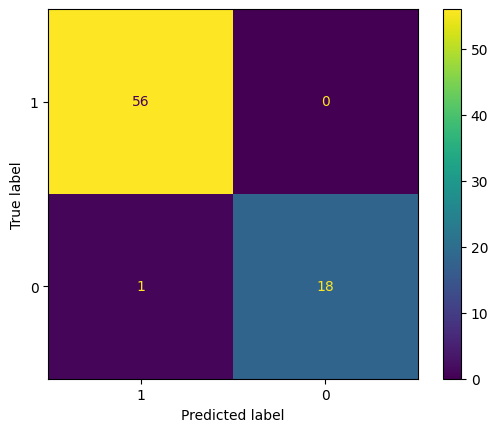

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        56
           0       1.00      0.95      0.97        19

    accuracy                           0.99        75
   macro avg       0.99      0.97      0.98        75
weighted avg       0.99      0.99      0.99        75




In [57]:
label = y_train.unique().tolist()
label = list(map(str, label))
print('AdaBoost + base Decision Tree - Train Set')
cmViz(gridSearchAda, X_train, y_train, label)
performance_check(gridSearchAda, X_train, y_train, label)
print('')

> Train Set

> *Confusion Metrics* 
> - Terdapat `56` data yg masuk ke dalam *True Postif*.
> - `18` data masuk ke dalam *True Negatif*.
> - `1` data masuk ke dalam *False Positif*.
> - dan **tidak ada data** yg masuk ke dalam *False Negatif*.

> *Performance Check*
> - *Accuracy*: secara keseluruhan nilai *accuracy model* sebesar `99%` valid.
> - *Precision*: Untuk *precision* model dapat memprediksi *class positif* dengan tepat `98%` dan `100%` untuk *class negatif*.
> - *Recall*: Untuk *recall* model hanya dapat memprediksi *class positif* dengan tepat `100%`, dan `95%` untuk *class negatif*.
> - *F1 score*: Untuk *F1* model dapat memprediksi *class positif* dengan tepat sebesar `99%`, dan `97%` untuk *class negatif*.

> Karna data target bisa dikatakan balance tidak ada class yg terlalu mendominasi. Maka hasil *accuracy* dapat dijadikan acuan untuk model.

> Karna pada project ini kasusnya adalah memprediksi kekambuhan cedera pada pemain basket. Jadi yg ***berbahaya*** adalah *False Negatif*, ketika model salah memprediksi pemain sembuh total dan tidak akan mengalami kekambuhan cedera pasca rehabilitasi.
Jadi nilai *recall* akan lebih diperhatikan untuk kasus ini.

> Secara keseluruhan dari hasil prediksi model terhadap Train Set bisa dikatakan bahwa model  ***tidak Under Fit***.


AdaBoost + base Decision Tree - test Set


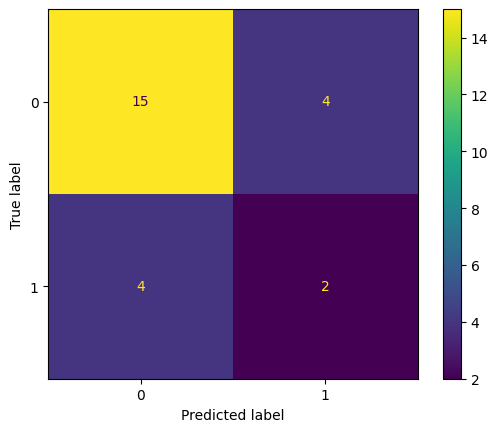

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25




In [58]:
label = y_test.unique().tolist()
label = list(map(str, label))
print('AdaBoost + base Decision Tree - test Set')
cmViz(gridSearchAda, X_test, y_test, label)
performance_check(gridSearchAda, X_test, y_test, label)
print('')

> Test Set

> *Confusion Metrics* 
> - Hanya ada `2` data terprediksi dengan tepat sebagai *True Postif*.
> - Terdapat `15` data yg masuk ke dalam *True Negatif*.
> - `4` data masuk ke dalam *False Positif*.
> - dan `4` data masuk ke dalam *False Negatif*.

> *Performance Check*
> - *Accuracy*: secara keseluruhan nilai *accuracy* model hanya sebesar `68%` valid.
> - *Precision*: Untuk *precision* model dapat memprediksi *class positif* dengan tepat sebesar `33%` dan `79%` untuk *class negatif*.
> - *Recall*: Untuk *recall* model dapat memprediksi *class positif* dengan tepat sebesar hanya `33%`, dan `79%` untuk *class negatif*.
> - *F1 score*: Untuk *F1* model dapat memprediksi *class positif* dengan tepat sebesar `33%`, dan `79%` untuk *class negatif*.

> Secara keseluruhan, hasil dari prediksi model terhadap *test set* jika dibandingkan dengan *train set*, dapat dikatakan bahwa model ***Goodfit***.

<!-- > Berdasarkan Hasil prediksi model *train set & test set* dengan menggunakan *hyperparamter*. 
> - ***True Negatif***: Model dapat memprediksi **semua class 0** dengan tepat.
> - ***True Positif***: Model tidak dapat memprediksi *adanya class 1*.
> - ***False Positif***: Model tidak dapat memprediksi *False Positif*
> - ***False Negatif***: Data yg diprediksi lebih besar dibandingkan dengan sebelum menggunakan ***hyperparameter***.

> Jadi dapat disimpulkan penggunaan *hyper parameter* kurang tepat untuk project kali ini. Karna pada project kali ini difokuskan untuk menghindari / mengurangi **False Negatif**. -->

# ***ix. Model Saving***
___
> Pada Project kali ini yg akan disimpan untuk digunakan pada *Model Inference* adalah *Model Logistic Regression* tanpa *Hyperparameter*.

In [59]:
# menyimpan model ke dalam basketInjModelV1.pkl dengan joblib
joblib.dump(gridSearchAda, 'basketInjModelV1.pkl')

['basketInjModelV1.pkl']

# ***x. Model Inference***
___
> *Model Inference* akan dilakukan pada notebook [P1M2_fhad_inf.ipynb](P1M2_fhad_inf.ipynb) dengan menggunakan *data synthetic* berdasarkan distribusi dari data asli.

In [60]:
# mengopi data asli
synthetic_data = data_ori.copy()
# drop Player_ID karna akan dibuat icrement
synthetic_data.drop('Player_ID', axis=1, inplace=True)
# drop Injury_Recurrence karna merupakan target yg diprediksi
synthetic_data.drop('Injury_Recurrence', axis=1, inplace=True)
# membuat DataFrame untuk menampung data synthetic
data_inf = pd.DataFrame()
# membuat data synthetic sebanyak 20 data
samples = 20
# memisahkan antara kolom numeric & categorical
num_cols_inf = synthetic_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_inf = synthetic_data.select_dtypes(exclude=[np.number]).columns.tolist()
# looping data numeric
for c in num_cols_inf:
    # menampung nilai mean ditribusi kolom
    mean_val = synthetic_data[c].mean()
    # menampung nilai std ditribusi kolom
    std_val = synthetic_data[c].std()
    # mengambil data berdasarkan nilai mean dan std
    data_inf[c] = np.random.normal(loc=mean_val, scale=std_val, size=samples)
    # data_inf[c] = np.random.choice(df[c].dropna(), size=samples, replace=True)
# looping data numeric
for c in cat_cols_inf:
    freqs = synthetic_data[c].value_counts(normalize=True)
    data_inf[c] = np.random.choice(freqs.index, size=samples, p=freqs.values)
    # data_inf[c] = np.random.choice(df[c].dropna(), size=samples, replace=True)

# Menambahkan Player_ID dengan cara increament
data_inf["Player_ID"] = range(1, samples + 1)
# Mengurutkan kolom
order = ['Player_ID'] + cat_cols_inf + num_cols_inf
data_inf = data_inf[order]
# simpan data ke dalam csv
data_inf.to_csv('data_inf.csv', index=False)


# ***xi. Pengambilan Keputusan***
___
> Secara keselurahan hasil pembuatan model untuk mengklasifikasi potensi seorang pemain basket akan mengalami kekambuhan cedera pasca rehabilitasi bisa dikatakan ***sukses / Acceptable*** karna model termasuk ke dalam kategori ***Good Fit***. 
Akan tetapi perlu ditinjau ulang kembali nilai *recall*nya.
Hal yg harus ditinjau ulang untuk pembuatan model versi lanjutan:
- Metode atau pendaketan untuk menentukan model yg akan digunakan.
- Kurangnya jumlah data yg digunakan untuk pembuatan model. 
- Perlu dilakukan *data collection* untuk menambahkan data yg akan digunakan pada pembuatan model versi selanjutnya.
___
## *Sekian & Terimakasih.*